# NENR DZ6 - ANFIS

## Uvod

Sustav **ANFIS** je sustav koji pokušava aproksimirati neku funkciju skupom pravila aktiviranih sigmoidalnim funkcijama podesivih, tj. naučivih parametara. Svako pravilo možemo zapisati kao 1 linearnu funkciju aktiviranu parametriziranom sigmoidom, tj.:

<br>

$$
    \large f_{pravilo}(\vec{x}) = \sigma_{T_p}\left( \vec{x} \right) \cdot \left( \vec{x} \cdot \vec{w_p}^T + b_p \right)
$$

<br>

gdje je

<br>

$$
    \large \sigma_{T_p}(\vec{x}) = \frac{1}{1 + e^{\vec{b_p} \cdot \left( \vec{x} - \vec{a_p} \right)}}
$$

<br>

Svako pravilo rezultirati će jednom neovisnom linearnom funkcijom određeno s onoliko težina kolika je dimenzionalnost ulaznog vektora te jednom varijablom pomaka te jednom nezavisnom sigmoidom koja je određena s 2 parametra: $a$ i $b$.

---

Ukoliko koristimo $n$ pravila, **ANFIS** se može poistovjetiti s jednim potpuno povezanim slojem koji ima $n$ izlaza, te $n$ međusobno nezavisnih parametriziranih sigmoida. Međutim, zbog toga što na ove parametrizirane sigmoide utječe i ulaz u mrežu prije nego što je premapiran potpuno povezanim slojem, ne možemo ju razdvojiti u 2 nezavisna sloja. Međutim, lakše će nam biti gledamo li mrežu kao jedan sloj, barem što se tiče povratne progapacije.

---

Linearnom funkcijom prvo preslikavamo ulaze:

<br>

$$
    \large f_{l}(\vec{x}) = \vec{x} \cdot \vec{w}^T + b
$$

<br>

Gdje ovog puta operator $\cdot$ predstavlja matrično množenje. Rezultat ove operacije uvijek će biti skalarna vrijednost.

---

Potom ćemo podesivom sigmoidom aktivirati ulaze, jednom po pravilu:

<br>

$$
    \large \sigma_{T_p}(\vec{x}) = \frac{1}{1 + e^{\vec{b_p} \cdot \left( \vec{x} - \vec{a_p} \right)}}
$$

<br>

što će u slučaju višedimenzionalnog ulaza, zbog toga što T-normu definiramo kao algebarski produkt, biti predstavljeno kao:

<br>

$$
    \large \sigma_{T_p}(\vec{x}) = \frac{1}{1 + e^{b_0 \cdot \left( x_0 - a_0 \right)}} \cdot \frac{1}{1 + e^{b_1 \cdot \left( x_1 - a_1 \right)}} \cdot \ldots \cdot \frac{1}{1 + e^{b_n \cdot \left( x_n - a_n \right)}}
$$

<br>

Kombinacijom $m$ pravila, dobit ćemo $m$ aktiviranih iznosa linearne kombinacije težina $\vec{w}$ i ulaza $\vec{x}$ uz pomake $\vec{b}$, koje ćemo tada uprosječiti uz težine aktivacija, tj.

<br>

$$
    \large f(\vec{x}) = \sum_{i=0}^{m}{\frac{f_{l_i}(\vec{x}) \cdot \sigma_{T_i}(\vec{x})}{\sum_{j = 0}^{m}{\sigma_{T_j}(\vec{x})}}}
$$

<br>

---

Ovo ponašanje modelirat ćemo jednom klasom **Rule**, ali ćemo povratnu propagaciju trebati implementirati u klasi nekog objekta koji će moći vidjeti sva pravila. Nazvat ćemo taj razred **ANFIS**, te će on biti vrlo sličan razredu **Model** koji možemo naći u **(mini)kerasu**.

<br><br>

## Povratna progacija

<br>

### Funkcija pogreške

Izlaz naše mreže $1$ je skalar. Kako se radi o regresijskom zadatku, odabrat ćemo funkciju pogreške za regresijske zadatke, npr. kvadratni gubitak. Funckiju pogreške definiramo kao

<br>

$$
    \large \mathcal{L}(y, \hat{y}) = \frac{1}{2}(y - \hat{y})^2
$$

<br>

što znači da će njezin gradient u odnosu na ulaz biti

$$
\begin{align}
    \large \frac{\partial{\mathcal{L}(y, \hat{y})}}{\partial{\hat{y}}}
    & = \large \frac{1}{2}(y - \hat{y})^2 \frac{\partial{}}{\partial{\hat{y}}}\\\\
    & = \large (\hat{y} - y)
\end{align}
$$

<br>

---

### Linearna funkcija

Izlaz mreže definiramo kao

<br>

$$
    \large f(\vec{x}) = \sum_{i=0}^{m}{\frac{f_{l_i}(\vec{x}) \cdot \sigma_{T_i}(\vec{x})}{\sum_{j = 0}^{m}{\sigma_{T_j}(\vec{x})}}}
$$

<br>

tj.

<br>

$$
    \large f(\vec{x}) = \sum_{i=0}^{m}{\frac{(\vec{x} \cdot \vec{w_i}^T + b_i) \cdot \sigma_{T_i}(\vec{x})}{\sum_{j = 0}^{m}{\sigma_{T_j}(\vec{x})}}}
$$

<br>

Tražimo li gradijent u odnosu na težine i pomake, vidimo da će zbog neovisnosti težina i pomaka nakon derivacije po težinama i pomaku ostati samo aktivacija za te težine i pomak uprosječena po svima aktivacijama. Drugim riječima, zbog toga što gore navedeni izraz je ekvivalentan

<br>

$$
    \large \hat{y} =
    \large \frac{(\vec{x} \cdot \vec{w_0}^T + b_0) \cdot \sigma_{T_0}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}} +
    \frac{(\vec{x} \cdot \vec{w_1}^T + b_1) \cdot \sigma_{T_1}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}} +
    \ldots +
    \frac{(\vec{x} \cdot \vec{w_m}^T + b_m) \cdot \sigma_{T_m}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}}
$$

<br>

gradijent težina za neko pravilo bit će onda

<br>

$$
\begin{align}
    \large \frac{\partial{\hat{y}}}{\partial{\vec{w_j}}} 
    & = \large \left( \frac{(\vec{x} \cdot \vec{w_0}^T + b_0) \cdot \sigma_{T_0}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}} +
    \frac{(\vec{x} \cdot \vec{w_1}^T + b_1) \cdot \sigma_{T_1}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}} +
    \ldots +
    \frac{(\vec{x} \cdot \vec{w_m}^T + b_m) \cdot \sigma_{T_m}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}} \right)
    \frac{\partial{}}{\partial{\vec{w_j}}} \\\\
    & = \large \frac{\vec{x} \cdot \sigma_{T_j}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}}
\end{align}
$$

<br>

tj. u slučaju pomaka

<br>

$$
\begin{align}
    \large \frac{\partial{\hat{y}}}{\partial{b_j}}
    & = \large \left( \frac{(\vec{x} \cdot \vec{w_0}^T + b_0) \cdot \sigma_{T_0}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}} +
    \frac{(\vec{x} \cdot \vec{w_1}^T + b_1) \cdot \sigma_{T_1}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}} +
    \ldots +
    \frac{(\vec{x} \cdot \vec{w_m}^T + b_m) \cdot \sigma_{T_m}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}} \right)
    \frac{\partial{}}{\partial{\vec{b_j}}} \\\\
    & = \large \frac{\sigma_{T_j}(\vec{x})}{\sum_{i = 0}^{m}{\sigma_{T_i}(x_i)}}
\end{align}
$$

<br>

Naposljetku, kako pogreška propagira kroz mrežu, težine podešavamo tako da su

<br>

$$
\begin{align}
    \large \vec{w}_{i_{j + 1}}
    & = \large \vec{w}_{i_{j}} - \eta \frac{\partial{\mathcal{L}}}{\partial{\vec{w_i}}} \\\\
    & = \large \vec{w}_{i_{j}} - \eta \frac{\partial{\mathcal{L}}}{\partial{\hat{y}}}\frac{\partial{\mathcal{\hat{y}}}}{\partial{\vec{w_i}}} \\\\
    & = \large \vec{w}_{i_{j}} - \eta (\hat{y} - y) \frac{\vec{x} \cdot \sigma_{T_i}(\vec{x})}{\sum_{k = 0}^{m}{\sigma_{T_k}(\vec{x})}}
\end{align}
$$

<br>

a pomake tako da

<br>

$$
\begin{align}
    \large b_{i_{j + 1}}
    & = \large b_{i_{j + 1}} - \eta \frac{\partial{\mathcal{L}}}{\partial{b_i}} \\\\
    & = \large b_{i_{j + 1}} - \eta \frac{\partial{\mathcal{L}}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{b_i}} \\\\
    & = \large b_{i_{j + 1}} - \eta (\hat{y} - y) \frac{\sigma_{T_i}(\vec{x})}{\sum_{k = 0}^{m}{\sigma_{T_k}(\vec{x})}}
\end{align}
$$

<br>

gdje je $\eta$ stopa učenja, tj. vrijedi

<br>

$$
    \large \eta \in \mathcal{R}, \eta > 0
$$

---

### Aktivacijska funkcija

Kao što smo prethodno razjasnili, funkcija koja obavlja svako pravilo ekvivalentna je

<br>

$$
    \large \sigma_{T_p}(\vec{x}) = \frac{1}{1 + e^{\vec{b_p} \cdot \left( \vec{x} - \vec{a_p} \right)}}
$$

<br>

Kao što vidimo, imamo 2 podesiva parametra, $a$ i $b$, koji su u slučaju višedimenzionalnog ulaza vektori istih dimenzija, tj. $\vec{a}$ i $\vec{b}$. Želimo li doći do gradijenta $\frac{\partial{\mathcal{L}}}{\partial{a_i}}$ i $\frac{\partial{\mathcal{L}}}{\partial{b_i}}$, morat ćemo ih prvo raspisati ulančanim pravilom:

<br>

$$
\begin{align}
    \large \frac{\partial{\mathcal{L}}}{\partial{a_i}}
    & = \large \frac{\partial{\mathcal{L}}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{a_i}} \\\\
    & = \large \frac{\partial{\mathcal{L}}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{\sigma_{T_i}}} \frac{\partial{\sigma_{T_i}}}{\partial{a_i}}
\end{align}
$$

<br>

i

<br>

$$
\begin{align}
    \large \frac{\partial{\mathcal{L}}}{\partial{b_i}}
    & = \large \frac{\partial{\mathcal{L}}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{b_i}} \\\\
    & = \large \frac{\partial{\mathcal{L}}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{\sigma_{T_i}}} \frac{\partial{\sigma_{T_i}}}{\partial{b_i}}
\end{align}
$$

<br>

Ove jednadžbe nam ukazuju da prije svega trebamo doznati $\frac{\partial{\hat{y}}}{\partial{\sigma_{T_i}}}$. Možemo pisati

<br>


$$
\begin{align}
    \large \frac{\partial{\hat{y}}}{\partial{\sigma_{T_i}}}
    & = \large \sum_{j=0}^{m}{\frac{f_{l_j}(\vec{x}) \cdot \sigma_{T_j}(\vec{x})}{\sum_{k = 0}^{m}{\sigma_{T_k}(\vec{x})}}} \frac{\partial{}}{\partial{\sigma_{T_i}}} \\\\
    & = \large \frac{\left( \sum_{j=0}^{m}{f_{l_j}(\vec{x}) \cdot \sigma_{T_j}(\vec{x})} \right) \frac{\partial{}}{\partial{\sigma_{T_i}}} \cdot \sum_{j = 0}^{m}{\sigma_{T_j}(\vec{x})} - \sum_{j=0}^{m}{f_{l_j}(\vec{x}) \cdot \sigma_{T_j}(\vec{x})} \cdot \left( \sum_{j = 0}^{m}{\sigma_{T_j}(\vec{x})} \right) \frac{\partial{}}{\partial{\sigma_{T_i}}}}{\left( \sum_{j = 0}^{m}{\sigma_{T_j}(\vec{x})} \right)^2} \\\\
    & = \large \frac{f_{l_i}(\vec{x}) \cdot \sum_{j = 0}^{m}{\sigma_{T_j}(\vec{x})} - \sum_{j=0}^{m}{f_{l_j}(\vec{x}) \cdot \sigma_{T_j}(\vec{x})}}{\left( \sum_{j = 0}^{m}{\sigma_{T_j}(\vec{x})} \right)^2} \\\\
    & = \large \frac{\sum_{j = 0}^{m}{\sigma_{T_j}(\vec{x})} \cdot \left( f_{l_i}(\vec{x}) - f_{l_j}(\vec{x}) \right)}{\left( \sum_{j = 0}^{m}{\sigma_{T_j}(\vec{x})} \right)^2}
\end{align}
$$

<br>

U kodu će se ovo zvati ```output_grad_wrt_activations```.

---

Trebamo izračunati $\frac{\partial{\sigma_{T_i}}}{\partial{a_i}}$ i $\frac{\partial{\sigma_{T_i}}}{\partial{b_i}}$. Podsjetimo se da smo $\sigma_{T_i}$ definirali ovako:

<br>

$$
\begin{align}
    \large \sigma_{T_i}(\vec{x})
    & = \large \frac{1}{1 + e^{b_i(\vec{x} - a_i)}} \\\\
    & = \large \frac{1}{1 + e^{b_0(x_0 - a_0)}} \cdot \frac{1}{1 + e^{b_1(x_1 - a_1)}} \cdot \ldots \cdot \frac{1}{1 + e^{b_n(x_n - a_n)}}
\end{align}
$$

<br>

Sukladno tome, vidljivo je da je naš vektor gradijent, gdje je za gradijent u odnosu na $a_i$ svaki element jednak

<br>

$$
\begin{align}
    \large \frac{\partial{\sigma_{T_i}}}{\partial{a_{i_j}}}
    & = \large \left( \frac{1}{1 + e^{b_0(x_0 - a_0)}} \cdot \frac{1}{1 + e^{b_1(x_1 - a_1)}} \cdot \ldots \cdot \frac{1}{1 + e^{b_n(x_n - a_n)}} \right) \frac{\partial{}}{\partial{a_{i_j}}} \\\\
    & = \left( \frac{1}{1 + e^{b_j(x_j - a_j)}} \cdot \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} \right) \frac{\partial{}}{\partial{a_{i_j}}} \\\\
    & = \large \frac{\frac{1}{1 + e^{b_j(x_j - a_j)}} \frac{\partial{}}{\partial{a_{i_j}}} \cdot \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} - \frac{1}{1 + e^{b_j(x_j - a_j)}} \cdot \left( \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} \right) \frac{\partial{}}{\partial{a_{i_j}}}}{\left( \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} \right)^2} \\\\
    & = \large \frac{\frac{1}{1 + e^{b_j(x_j - a_j)}} \frac{\partial{}}{\partial{a_{i_j}}} \cdot \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})}}{\left( \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} \right)^2}
\end{align}
$$

<br>

Izraz $\frac{1}{1 + e^{b_j(x_j - a_j)}} \frac{\partial{}}{\partial{a_{i_j}}}$ tada dobivamo ovako:

<br>

$$
\begin{align}
    \large \frac{1}{1 + e^{b_j(x_j - a_j)}} \frac{\partial{}}{\partial{a_{i_j}}}
    & = \large -\left( 1 + e^{b_j(x_j - a_j)} \right)^{-2} \cdot \left( 1 + e^{b_j(x_j - a_j)} \right) \frac{\partial{}}{\partial{a_{i_j}}} \\\\
    & = \large -\left( 1 + e^{b_j(x_j - a_j)} \right)^{-2} \cdot e^{b_j(x_j - a_j)} \left( b_j(x_j - a_j) \right) \frac{\partial{}}{\partial{a_{i_j}}} \\\\
    & = \large -\left( 1 + e^{b_j(x_j - a_j)} \right)^{-2} \cdot e^{b_j(x_j - a_j)} \cdot \left( -b_j \right) \\\\
    & = \large b_j \cdot \left( 1 + e^{b_j(x_j - a_j)} \right)^{-2} \cdot e^{b_j(x_j - a_j)} \\\\
    & = \large b_j \cdot \frac{1}{1 + e^{b_j(x_j - a_j)}} \cdot \frac{e^{b_j(x_j - a_j)}}{1 + e^{b_j(x_j - a_j)}} \\\\
    & = \large b_j \cdot \frac{1}{1 + e^{b_j(x_j - a_j)}} \cdot \frac{1 + e^{b_j(x_j - a_j)} - 1}{1 + e^{b_j(x_j - a_j)}} \\\\
    & = \large b_j \cdot \frac{1}{1 + e^{b_j(x_j - a_j)}} \cdot \left( 1 - \frac{1}{1 + e^{b_j(x_j - a_j)}} \right) \\\\
    & = \large b_j \cdot \sigma_{{T_i}_j} \cdot \left( 1 - \sigma_{{T_i}_j} \right)
\end{align}
$$

<br>

U kodu će se ovo zvati ```sigmoid_grad_wrt_a```.

što znači da naš gradijent, ukoliko $\prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})}$ raspišemo kao $\frac{\sigma_{T_i}(\vec{x})}{\sigma_{{T_i}_j}(\vec{x})}$, možemo finalno zapisati kao

<br>

$$
\begin{align}
    \large \frac{\partial{\sigma_{T_i}}}{\partial{a_{i_j}}}
    & = \large \frac{b_j \cdot \sigma_{{T_i}_j} \cdot \left( 1 - \sigma_{{T_i}_j} \right) \cdot \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})}}{\left( \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} \right)^2} \\\\
    & = \large \frac{b_j \cdot \sigma_{{T_i}_j} \cdot \left( 1 - \sigma_{{T_i}_j} \right)}{\prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})}} \\\\
    & = \large \frac{b_j \cdot \sigma_{{T_i}_j} \cdot \left( 1 - \sigma_{{T_i}_j} \right) \cdot \sigma_{{T_i}_j}(\vec{x})}{\sigma_{T_i}(\vec{x})} \\\\
    & = \large \frac{b_j \cdot \sigma_{{T_i}_j}^2 \cdot \left( 1 - \sigma_{{T_i}_j} \right)}{\sigma_{T_i}(\vec{x})}
\end{align}
$$

<br>

U kodu će se ovo zvati ```activation_grad_wrt_a```.

---

Na sličan način ćemo izračunati i gradijent u odnosu na $b_i$:

<br>

$$
\begin{align}
    \large \frac{\partial{\sigma_{T_i}}}{\partial{b_{i_j}}}
    & = \large \left( \frac{1}{1 + e^{b_0(x_0 - a_0)}} \cdot \frac{1}{1 + e^{b_1(x_1 - a_1)}} \cdot \ldots \cdot \frac{1}{1 + e^{b_n(x_n - a_n)}} \right) \frac{\partial{}}{\partial{b_{i_j}}} \\\\
    & = \left( \frac{1}{1 + e^{b_j(x_j - a_j)}} \cdot \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} \right) \frac{\partial{}}{\partial{b_{i_j}}} \\\\
    & = \large \frac{\frac{1}{1 + e^{b_j(x_j - a_j)}} \frac{\partial{}}{\partial{b_{i_j}}} \cdot \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} - \frac{1}{1 + e^{b_j(x_j - a_j)}} \cdot \left( \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} \right) \frac{\partial{}}{\partial{b_{i_j}}}}{\left( \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} \right)^2} \\\\
    & = \large \frac{\frac{1}{1 + e^{b_j(x_j - a_j)}} \frac{\partial{}}{\partial{b_{i_j}}} \cdot \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})}}{\left( \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} \right)^2}
\end{align}
$$

<br>

Izraz $\frac{1}{1 + e^{b_j(x_j - a_j)}} \frac{\partial{}}{\partial{b_{i_j}}}$ na sličan način dobivamo ovako:

<br>

$$
\begin{align}
    \large \frac{1}{1 + e^{b_j(x_j - a_j)}} \frac{\partial{}}{\partial{b_{i_j}}}
    & = \large -\left( 1 + e^{b_j(x_j - a_j)} \right)^{-2} \cdot \left( 1 + e^{b_j(x_j - a_j)} \right) \frac{\partial{}}{\partial{b_{i_j}}} \\\\
    & = \large -\left( 1 + e^{b_j(x_j - a_j)} \right)^{-2} \cdot e^{b_j(x_j - a_j)} \left( b_j(x_j - a_j) \right) \frac{\partial{}}{\partial{b_{i_j}}} \\\\
    & = \large -\left( 1 + e^{b_j(x_j - a_j)} \right)^{-2} \cdot e^{b_j(x_j - a_j)} \cdot \left( x_j - a_j \right) \\\\
    & = \large \left( a_j - x_j \right) \cdot \left( 1 + e^{b_j(x_j - a_j)} \right)^{-2} \cdot e^{b_j(x_j - a_j)} \\\\
    & = \large \left( a_j - x_j \right) \cdot \frac{1}{1 + e^{b_j(x_j - a_j)}} \cdot \frac{e^{b_j(x_j - a_j)}}{1 + e^{b_j(x_j - a_j)}} \\\\
    & = \large \left( a_j - x_j \right) \cdot \frac{1}{1 + e^{b_j(x_j - a_j)}} \cdot \frac{1 + e^{b_j(x_j - a_j)} - 1}{1 + e^{b_j(x_j - a_j)}} \\\\
    & = \large \left( a_j - x_j \right) \cdot \frac{1}{1 + e^{b_j(x_j - a_j)}} \cdot \left( 1 - \frac{1}{1 + e^{b_j(x_j - a_j)}} \right) \\\\
    & = \large\left( a_j - x_j \right) \cdot \sigma_{{T_i}_j} \cdot \left( 1 - \sigma_{{T_i}_j} \right)
\end{align}
$$

<br>

Opet ćemo $\prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})}$ raspisati kao $\frac{\sigma_{T_i}(\vec{x})}{\sigma_{{T_i}_j}(\vec{x})}$, pa sve možemo finalno zapisati kao

<br>

$$
\begin{align}
    \large \frac{\partial{\sigma_{T_i}}}{\partial{b_{i_j}}}
    & = \large \frac{\left( a_j - x_j \right) \cdot \sigma_{{T_i}_j} \cdot \left( 1 - \sigma_{{T_i}_j} \right) \cdot \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})}}{\left( \prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})} \right)^2} \\\\
    & = \large \frac{\left( a_j - x_j \right) \cdot \sigma_{{T_i}_j} \cdot \left( 1 - \sigma_{{T_i}_j} \right)}{\prod_{k = 0, k \neq j}^{m}{\sigma_{{T_i}_k}(\vec{x})}} \\\\
    & = \large \frac{\left( a_j - x_j \right) \cdot \sigma_{{T_i}_j} \cdot \left( 1 - \sigma_{{T_i}_j} \right) \cdot \sigma_{{T_i}_j}(\vec{x})}{\sigma_{T_i}(\vec{x})} \\\\
    & = \large \frac{\left( a_j - x_j \right) \cdot \sigma_{{T_i}_j}^2 \cdot \left( 1 - \sigma_{{T_i}_j} \right)}{\sigma_{T_i}(\vec{x})}
\end{align}
$$

---

Uredimo li sad malo ove izraze, skratimo ih tako da vrijedi:

<br>

$$
\begin{align}
    & \large d_{\mathcal{L}} \equiv \frac{\partial{\mathcal{L}(y, \hat{y})}}{\partial{\hat{y}}} \\\\
    & \large d_{out} \equiv \frac{\partial{\hat{y}}}{\partial{\sigma_{T_i}}} \\\\
    & \large d_{\sigma} \equiv \frac{\vec{\sigma_{{T_i}}}^2 \circ \left( \vec{1} - \vec{\sigma_{{T_i}}} \right)}{\sigma_{T_i}(\vec{x})} \\\\
\end{align}
$$

<br>

gdje $\circ$ označava Hadamardov produkt (još zvano element-wise multiplication), onda možemo pisati

<br>

$$
\begin{align}
    \large \frac{\partial{\mathcal{L}}}{\partial{a_i}} & = \large \vec{b} \circ d_{\mathcal{L}} \circ d_{out} \circ d_{\sigma} \\\\
    \large \frac{\partial{\mathcal{L}}}{\partial{b_i}} & = \large \left( \vec{a} - \vec{x} \right) \circ d_{\mathcal{L}} \circ d_{out} \circ d_{\sigma}
\end{align}
$$

<br>

Pa se težine za $i$. pravilo ažuriraju na sljedeći način:

<br>

$$
\begin{align}
    \large \vec{a_{i_{j + 1}}}
    & = \large \vec{a_{i_j}} - \eta \circ \left( \hat{y} - y \right)
    \circ \vec{b_i}
    \circ \frac{\sum_{k = 0}^{m}{\sigma_{T_k}(\vec{x})} \cdot \left( f_{l_i}(\vec{x}) - f_{l_k}(\vec{x}) \right)}{\left( \sum_{k = 0}^{m}{\sigma_{T_k}(\vec{x})} \right)^2}
    \circ \frac{\vec{\sigma_{{T_i}}}^2 \circ \left( \vec{1} - \vec{\sigma_{{T_i}}} \right)}{\sigma_{T_i}(\vec{x})} \\\\
    \large \vec{b_{i_{j + 1}}} \circ 
    & = \large \vec{b_{i_j}} - \eta \circ \left( \hat{y} - y \right)
    \circ \left( \vec{a_i} - \vec{x} \right)
    \circ \frac{\sum_{k = 0}^{m}{\sigma_{T_k}(\vec{x})} \cdot \left( f_{l_i}(\vec{x}) - f_{l_k}(\vec{x}) \right)}{\left( \sum_{k = 0}^{m}{\sigma_{T_k}(\vec{x})} \right)^2}
    \circ \frac{\vec{\sigma_{{T_i}}}^2 \circ \left( \vec{1} - \vec{\sigma_{{T_i}}} \right)}{\sigma_{T_i}(\vec{x})} \\\\
\end{align}
$$

<br>

gdje valja primijetiti da izraz $\sigma_{T_i}$ predstavlja T normu svih aktivacija za $i$. pravilo, a $\vec{\sigma_{T_i}}$ vektor dimenzija $1 \times n$, tj. vektor svih aktivacija za $i$. pravilo. Kao i prije, $\eta$ predstavlja stopu učenja, međutim, nije nužno jednaka stopi učenja za ažuriranje težina linearne funkcije (obično je veća).

### Inicijalizacija aktivacijskog sloja

Svaki ovakav sloj primati će broj ulaza kao parametar, s obzirom da modeliramo jednak broj nezavisnih sigmoida. Svaka ta sigmoid sadržavat će 2 podesiva parametra, $a$ i $b$, pa ćemo, urednosti radi, svaki **TrainableAccumulationSigmoid** inicijalizirati s 2 vektora, $\vec{a}$ i $\vec{b}$, a ako broj ulaza definiramo kao $m$, oba će biti oblika $1 \times m$.

Za razliku od ostalih incijalizacija, koje uvelike inicijaliziraju vrijednosti na nasumične vrijednosti iz uniformne ili normalne razidiobe, mi ćemo sve nezavisne sigmoide incijalizirati tako da

<br>

$$
    \large \vec{a} = \vec{0} \\\\\\
    \large \vec{b} = \vec{1}
$$

<br>

tj. svaka će sigmoid na početku biti jednaka standardnoj sigmoidi.

<br><br><br>

## Učitavanje resursa

### Python alati

In [1]:
from matplotlib import cm, pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from tqdm import tqdm

### ANFIS

In [2]:
from anfis import ANFIS
from losses import SquareError
from util import generate_anfis_dataset

<br><br>

## Generiranje dataseta

Generiramo dataset koristeći funkciju **generate_anfis_dataset** iz **util.py**:

In [3]:
x_range = (-4, 4 + 1)
y_range = (-4, 4 + 1)

x_tr, y_tr = generate_anfis_dataset(x_range, y_range)

Točke možemo prikazati kao površinu u 3D prostoru:

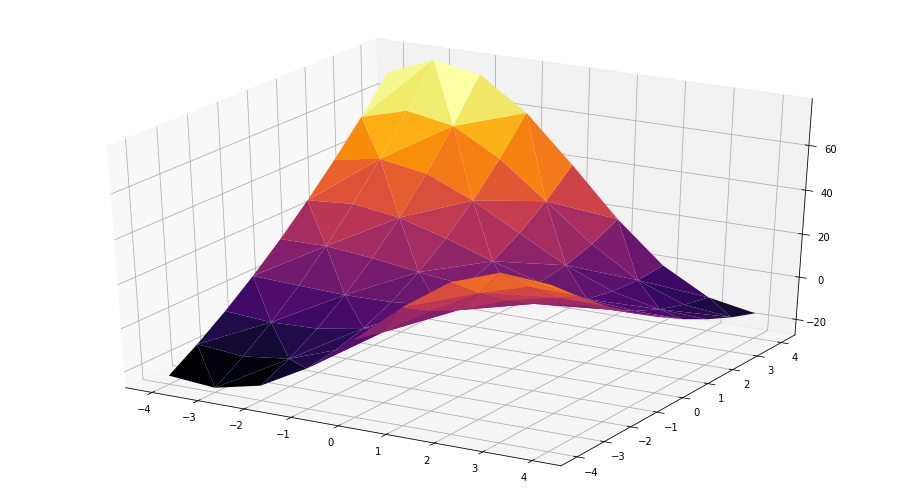

In [4]:
fig = plt.figure(figsize=(16, 9))
ax = plt.gca(projection='3d')

x_axis = np.arange(*x_range)
y_axis = np.arange(*y_range)
z_axis = np.linspace(np.min(y_tr), np.max(y_tr) + 1, len(x_axis))

x_data, y_data = list(zip(*x_tr))
z_data = y_tr

ax.plot_trisurf(x_data, y_data, z_data, cmap=cm.inferno);

<br><br>

## Zadatak 4.

Trenirat ćemo nekoliko mreža ne bi li našli optimalne parametre za zadanu funkciju. Neki od hiperparametara bit će konstantni kroz učenje:

In [5]:
loss_1 = SquareError()

batch_sizes_1 = [1, len(x_tr)]
epochs_1 = 50
verbose_1 = 0
shuffle_1 = False
learning_rate_dense_1 = 1e-3
learning_rate_sigmoid_1 = 1e-4

### Jedno pravilo

Generirat ćemo ANFIS s 1 pravilom tako da prilikom kreacije klase predamo kao drugi parametar broj pravila, u ovom slučaju 1.

In [6]:
x_tr, y_tr = [np.array(x) for x in [x_tr, y_tr]]

models_one_rule = [None, None]
histories_one_rule = [None, None]

for i, batch_size in enumerate(batch_sizes_1):
    models_one_rule[i] = ANFIS(2, 1)
    models_one_rule[i].compile(loss=loss_1)
    
    
    histories_one_rule[i] = models_one_rule[i].fit(x=x_tr, y=y_tr,
                                                   batch_size=batch_size,
                                                   epochs=epochs_1,
                                                   verbose=verbose_1,
                                                   shuffle=shuffle_1,
                                                   learning_rate_dense=learning_rate_dense_1,
                                                   learning_rate_sigmoid=learning_rate_sigmoid_1,
                                                   stop_after_no_improvement=False)

Možemo prikazati što se događalo s gubitkom tijekom učenja:

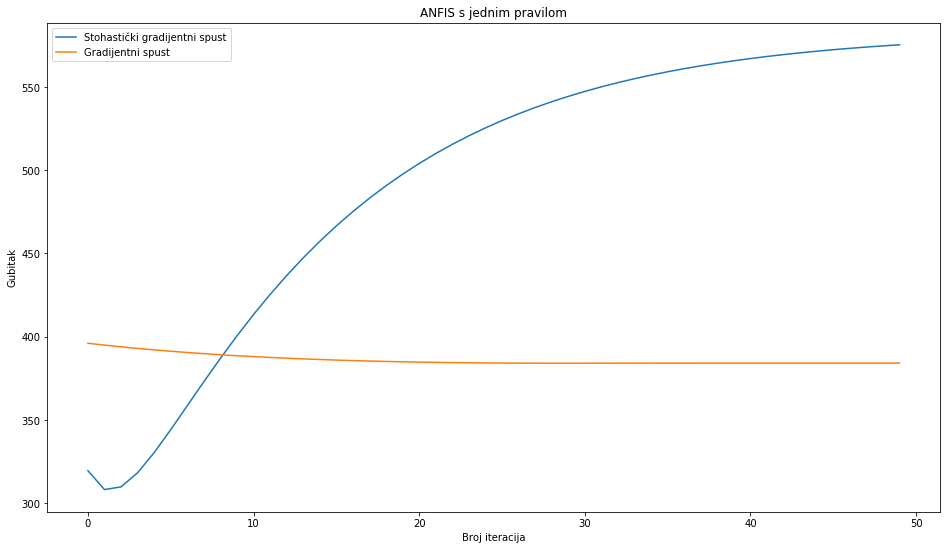

In [7]:
losses_1 = [history["loss"] for history in histories_one_rule]
last_losses_1 = [[interior_loss[-1] for interior_loss in some_loss] for some_loss in losses_1]

x_axis_1 = np.arange(len(last_losses_1[0]))
names_1 = ["Stohastički gradijentni spust", "Gradijentni spust"]

plt.figure(figsize=(16, 9))
plt.title("ANFIS s jednim pravilom")
plt.xlabel("Broj iteracija")
plt.ylabel("Gubitak")

for i, loss in enumerate(last_losses_1):
    plt.plot(x_axis_1, loss, label=names_1[i])

plt.legend();

### Dva pravila

Postupak je analogan kao i iznad:

In [8]:
models_two_rules = [None, None]
histories_two_rules = [None, None]

for i, batch_size in enumerate(batch_sizes_1):
    models_two_rules[i] = ANFIS(2, 2)
    models_two_rules[i].compile(loss=loss_1)
    
    histories_two_rules[i] = models_two_rules[i].fit(x=x_tr, y=y_tr,
                                                     batch_size=batch_size,
                                                     epochs=epochs_1,
                                                     verbose=verbose_1,
                                                     shuffle=shuffle_1,
                                                     learning_rate_dense=learning_rate_dense_1,
                                                     learning_rate_sigmoid=learning_rate_sigmoid_1,
                                                     stop_after_no_improvement=False)

C:\Projects\Uni\NENR\DZ\DZ6\rule.py:50: RuntimeWarning: overflow encountered in exp
  return np.reciprocal(1 + np.exp(self.b * (inputs - self.a)))


I opet možemo prikazati što se događa s gubitkom:

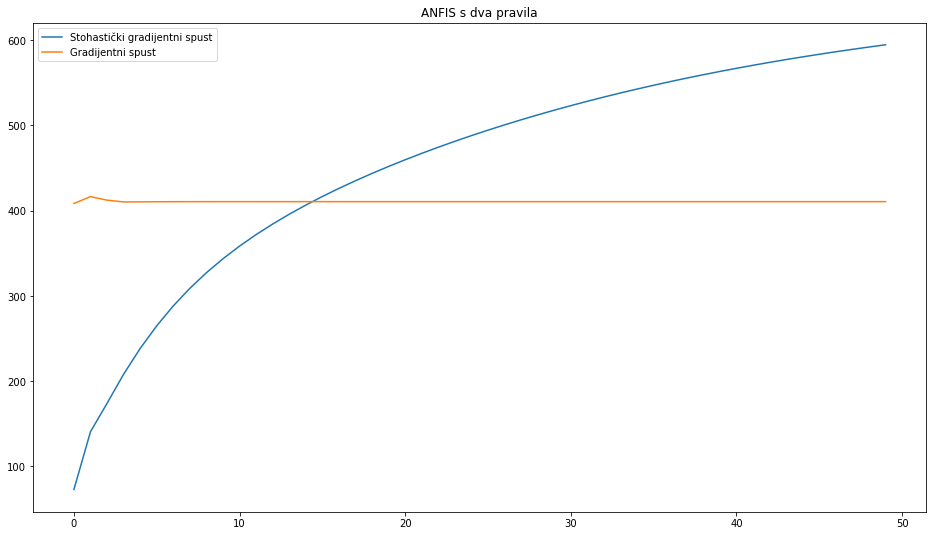

In [9]:
losses_2 = [history["loss"] for history in histories_two_rules]
last_losses_2 = [[interior_loss[-1] for interior_loss in some_loss] for some_loss in losses_2]

x_axis_2 = np.arange(len(last_losses_2[0]))
names_2 = ["Stohastički gradijentni spust", "Gradijentni spust"]

plt.figure(figsize=(16, 9))
plt.title("ANFIS s dva pravila")

for i, loss in enumerate(last_losses_2):
    plt.plot(x_axis_2, loss, label=names_2[i])

plt.legend();

### Optimalan broj pravila

Kako bi doznali koji je optimalan broj pravila, pokušat ćemo doći do najmanje pogreške. Pretpostavimo da se ova funkcija može aproksimirati s najviše $20$ pravila. Onda ćemo gledati što se događa s gubitkom za svaki broj pravila u intervalu $[5, 20]$.

In [10]:
rule_count_range = (5, 20 + 1)
evaluation_count = rule_count_range[1] - rule_count_range[0]

models_optimum_rules = [None] * evaluation_count
histories_optimum_rules = [None] * evaluation_count

for i, rule_count in enumerate(tqdm(range(*rule_count_range))):
    models_optimum_rules[i] = [None, None]
    histories_optimum_rules[i] = [None, None]
    
    for j, batch_size in enumerate(batch_sizes_1):
        models_optimum_rules[i][j] = ANFIS(2, rule_count)
        models_optimum_rules[i][j].compile(loss=loss_1)
        
        histories_optimum_rules[i][j] = models_optimum_rules[i][j].fit(x=x_tr, y=y_tr,
                                                                       batch_size=batch_size,
                                                                       epochs=epochs_1,
                                                                       verbose=-5,
                                                                       shuffle=shuffle_1,
                                                                       learning_rate_dense=learning_rate_dense_1 * rule_count,
                                                                       learning_rate_sigmoid=learning_rate_sigmoid_1 * rule_count,
                                                                       stop_after_no_improvement=False)

100%|██████████| 16/16 [01:59<00:00,  7.48s/it]


In [11]:
cutoff = 7
x_axis_optimum = np.arange(epochs_1)

S obzirom da smo istestirali velik broj postavki, nacrtat ćemo 4 odvojena grafa:

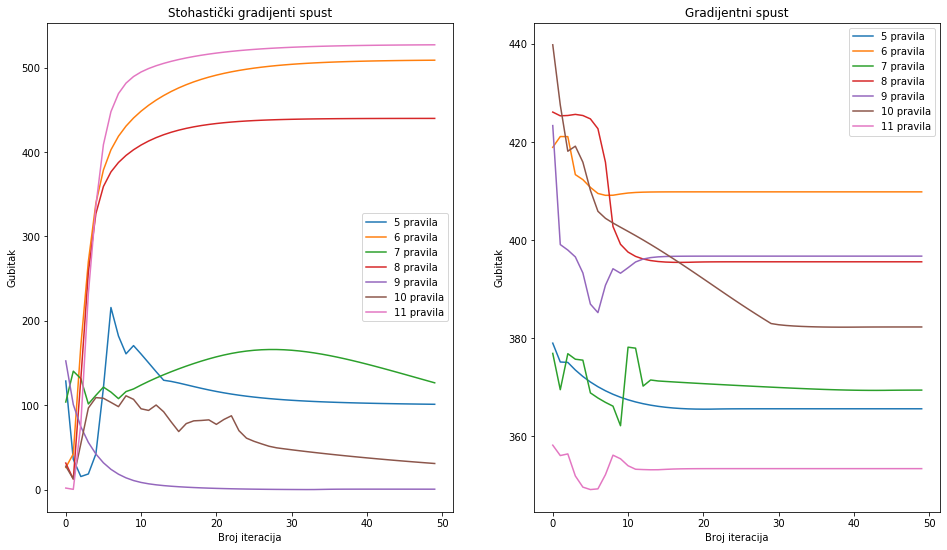

In [12]:
fig_1, axs = plt.subplots(1, 2)
fig_1.set_figwidth(16)
fig_1.set_figheight(9)

names_1 = ["Stohastički gradijenti spust", "Gradijentni spust"]

for i in range(2):
    axs[i].set_title(names_1[i])
    axs[i].set_xlabel("Broj iteracija")
    axs[i].set_ylabel("Gubitak")

for i, history in enumerate(histories_optimum_rules[:cutoff], rule_count_range[0]):
    for j, loss in enumerate([[l[-1] for l in choice["loss"]] for choice in history]):
        axs[j].plot(x_axis_optimum, loss, label=f"{i} pravila")
        axs[j].legend();

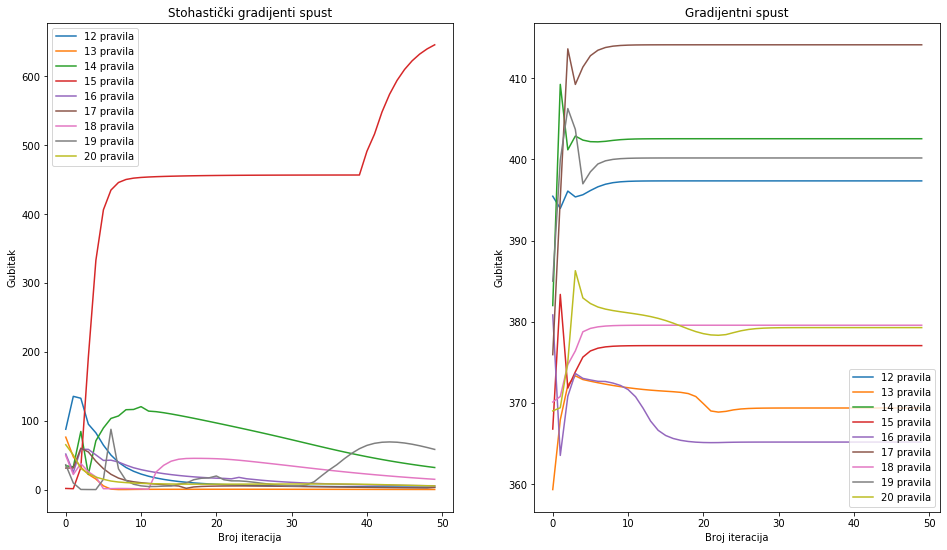

In [13]:
fig_1, axs = plt.subplots(1, 2)
fig_1.set_figwidth(16)
fig_1.set_figheight(9)

names_1 = ["Stohastički gradijenti spust", "Gradijentni spust"]

for i in range(2):
    axs[i].set_title(names_1[i])
    axs[i].set_xlabel("Broj iteracija")
    axs[i].set_ylabel("Gubitak")

for i, history in enumerate(histories_optimum_rules[cutoff:], rule_count_range[0] + cutoff):
    for j, loss in enumerate([[l[-1] for l in choice["loss"]] for choice in history]):
        axs[j].plot(x_axis_optimum, loss, label=f"{i} pravila")
        axs[j].legend();

Optimalan broj pravila je najmanji broj pravila kod kojeg mreža uspijeva učiti. Ako pogledamo grafove, to se događa kad broj pravila dosegne $7$. Stoga možemo reći da je $9$ pravila optimalno za ovu funkciju. Sad ćemo, po posljednji put istrenirati svih $6$ mreža u potpunosti, na većem broju epoha, ali i uz prijevremeno zaustavljanje.

## Priprema mreža

In [14]:
rule_counts_final = [1, 2, 7] * 2
batch_sizes_final = [1] * 3 + [len(x_tr)] * 3

loss_final = SquareError()
epochs_final = 2000
verbose_final = 0
shuffle_final = True
lr_dense_final = 1e-4
lr_sigmoid_final = 1e-3
stop_after_no_improvement_final = False

models_final = list()

rules_and_batches = list(zip(rule_counts_final, batch_sizes_final))

for i in tqdm(range(len(rules_and_batches))):
    rule_count, batch_size = rules_and_batches[i]
    
    models_final.append(ANFIS(2, rule_count))
    models_final[-1].compile(loss=loss_1)
    
    models_final[-1].fit(x=x_tr, y=y_tr,
                         batch_size=batch_size,
                         epochs=epochs_final,
                         verbose=verbose_final,
                         shuffle=shuffle_final,
                         learning_rate_dense=lr_dense_final,
                         learning_rate_sigmoid=lr_sigmoid_final,
                         stop_after_no_improvement=stop_after_no_improvement_final)

100%|██████████| 6/6 [05:50<00:00, 58.40s/it]


In [15]:
stochastic_1_rule, stochastic_2_rules, stochastic_optimum,\
classic_1_rule, classing_2_rules, classic_optimum = models_final

Izračunajmo sad za svaki od modela funkciju na ulaznom skupu podataka:

In [16]:
x_final, y_final = list(zip(*x_tr))

zs_final = list()

for model in models_final:
    outputs = list()
    
    for input_entry in x_tr:
        outputs.append(model.infer(input_entry))
        
    zs_final.append(np.array(outputs))

---

### Zadatak 4.a

Sada možemo za svaki od naučenih modela iscrtati dobivene funkcije:

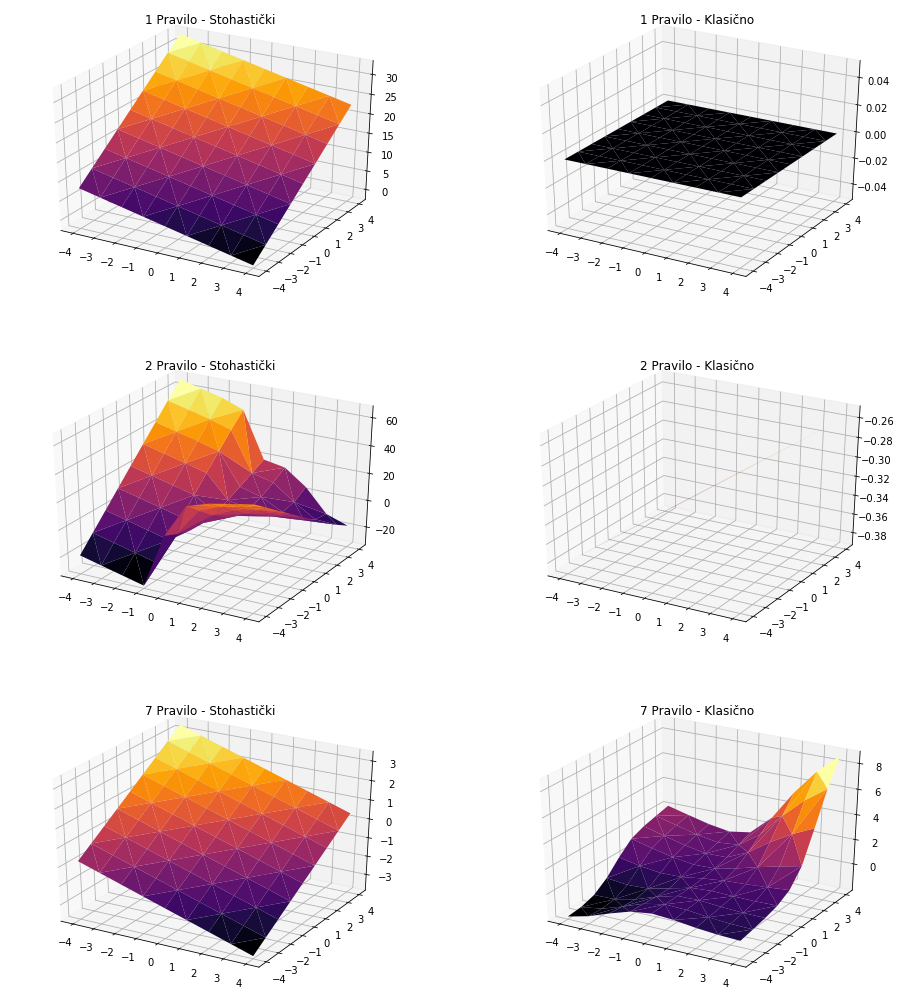

In [17]:
fig_final = plt.figure()

ax_final = [fig_final.add_subplot(3, 2, i + 1, projection="3d") for i in range(6)]

titles_final = list()

for i in range(len(rule_counts_final)):
    titles_final.append(f"{rule_counts_final[(i // 2) + (len(rule_counts_final) // 2) * (i % 2)]} " +
                        f"Pravilo - {'Stohastički' if i % 2 == 0 else 'Klasično'}")

fig_final.set_figwidth(16)
fig_final.set_figheight(18)

for i in range(len(zs_final)):
    ax_final[i].set_title(titles_final[i])
    
    ax_final[i].plot_trisurf(x_final, y_final, zs_final[i], cmap=cm.inferno);

---

### Zadatak 4.b


Sada valja nacrtati grafove koje prikazuju pogrešku mreže. Za izračun pogreške koristit ćemo jednostavan izraz:

<br>

$$
    \large f_E \left( y, \hat{y} \right) = y - \hat{y}
$$

<br>

In [18]:
ys_real = list()

for model in models_final:
    ys_real.append(y_tr)
    
errors_final = np.array(ys_real) - np.array(zs_final)

Na sličan način kao i gore čemu nacrtati grafove:

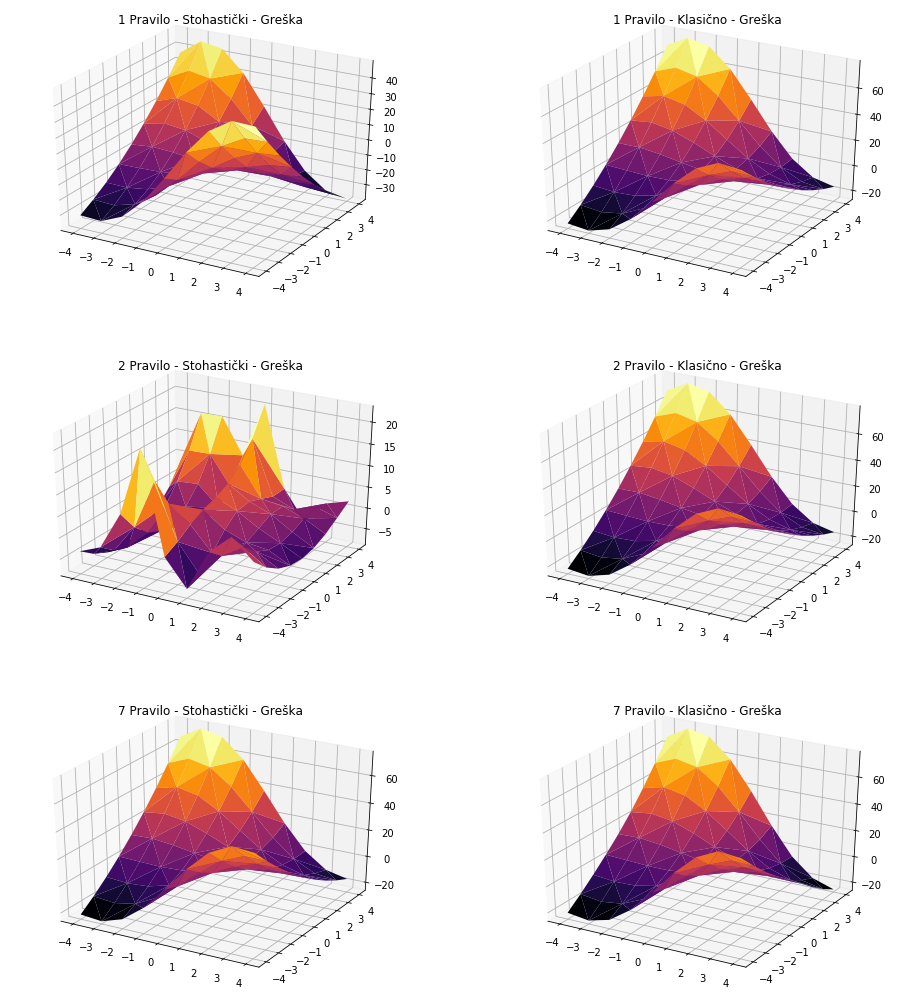

In [19]:
fig_final_e = plt.figure()

ax_final_e = [fig_final_e.add_subplot(3, 2, i + 1, projection="3d") for i in range(6)]

titles_final_e = list()

for i in range(len(rule_counts_final)):
    titles_final_e.append(f"{rule_counts_final[(i // 2) + (len(rule_counts_final) // 2) * (i % 2)]} " +
                          f"Pravilo - {'Stohastički' if i % 2 == 0 else 'Klasično'} - Greška")

fig_final_e.set_figwidth(16)
fig_final_e.set_figheight(18)

for i in range(len(errors_final)):
    ax_final_e[i].set_title(titles_final_e[i])
    
    ax_final_e[i].plot_trisurf(x_final, y_final, errors_final[i], cmap=cm.inferno);

<br><br>

## Zadatak 5.

Sada ćemo za sustav od $7$ pravila nacrtati funkcije pripadnosti. Do konkretnih vrijednosti možemo doći dohvaćanjem svojstva **rules** nekog od ANFIS modela. Jednom kada imamo pravila, svakom pravilu možemo iščitati $4$ vrijednosti - $\vec{w}$, $b$, $\vec{a}$ i $\vec{b}$. Uz pomoć prvog para možemo nacrtati linearnu funkciju, dok uz druga dva para možemo nacrtati funkciju pripadnosti. Kako se radi o ulazu od $2$ dimenzije, onda će nam i linearne funkcije i funkcije pripadnosti biti dvodimenzionalne, pa iz prikazujemo plohama na **3D** grafu.

Prvo moramo napisati funkciju koja će nam za neko pravilo vratiti $2$ liste trojki koje tada možemo predati **matplotlib**u na iscrtavanje. Kako bi olakšali stvaranje funkcija, prije svega ćemo napraviti generatore funkcija za neke parametre:

In [20]:
def generate_linear(weights, bias):
    return lambda x: x @ weights + bias

def generate_sigmoid(a, b):
    return lambda x: np.product(np.reciprocal(1. + np.exp(np.multiply(b, x - a))))

Onda možemo preći na stvaranje trojki:

In [21]:
def get_plot_axes(anfis_model, x_domain=x_range, y_domain=y_range):
    _linear = list()
    _sigmoid = list()
    
    _rules = anfis_model.rules
    
    for rule in _rules:
        _linear.append(generate_linear(rule.weights, rule.bias))
        _sigmoid.append(generate_sigmoid(rule.a, rule.b))
        
    _linear_triples = list()
    _sigmoid_triples = list()
    
    for linear_function, sigmoid_function in zip(_linear, _sigmoid):
        _x = list()
        _y = list()
        _z_l = list()
        _z_s = list()
        
        for x in range(*x_domain):
            for y in range(*y_domain):
                _x.append(float(x))
                _y.append(float(y))
                
                _arg = np.array([_x[-1], _y[-1]])
                
                _z_l.append(linear_function(_arg))
                _z_s.append(sigmoid_function(_arg))
                
        _linear_triples.append((_x, _y, _z_l))
        _sigmoid_triples.append((_x, _y, _z_s))
        
    return _linear_triples, _sigmoid_triples

---

Sada možemo stvoriti podatke i iscrtati grafove:

In [22]:
model_to_draw = classic_optimum

linear_triples, sigmoid_triples = get_plot_axes(model_to_draw)

task_5_rule_count = len(linear_triples)

task_5_linear_zmin = np.min([[np.min(x) for x in triple[2]] for triple in linear_triples])
task_5_linear_zmax = np.max([[np.max(x) for x in triple[2]] for triple in linear_triples])

task_5_sigmoid_zmin, task_5_sigmoid_zmax = (0., 1.)

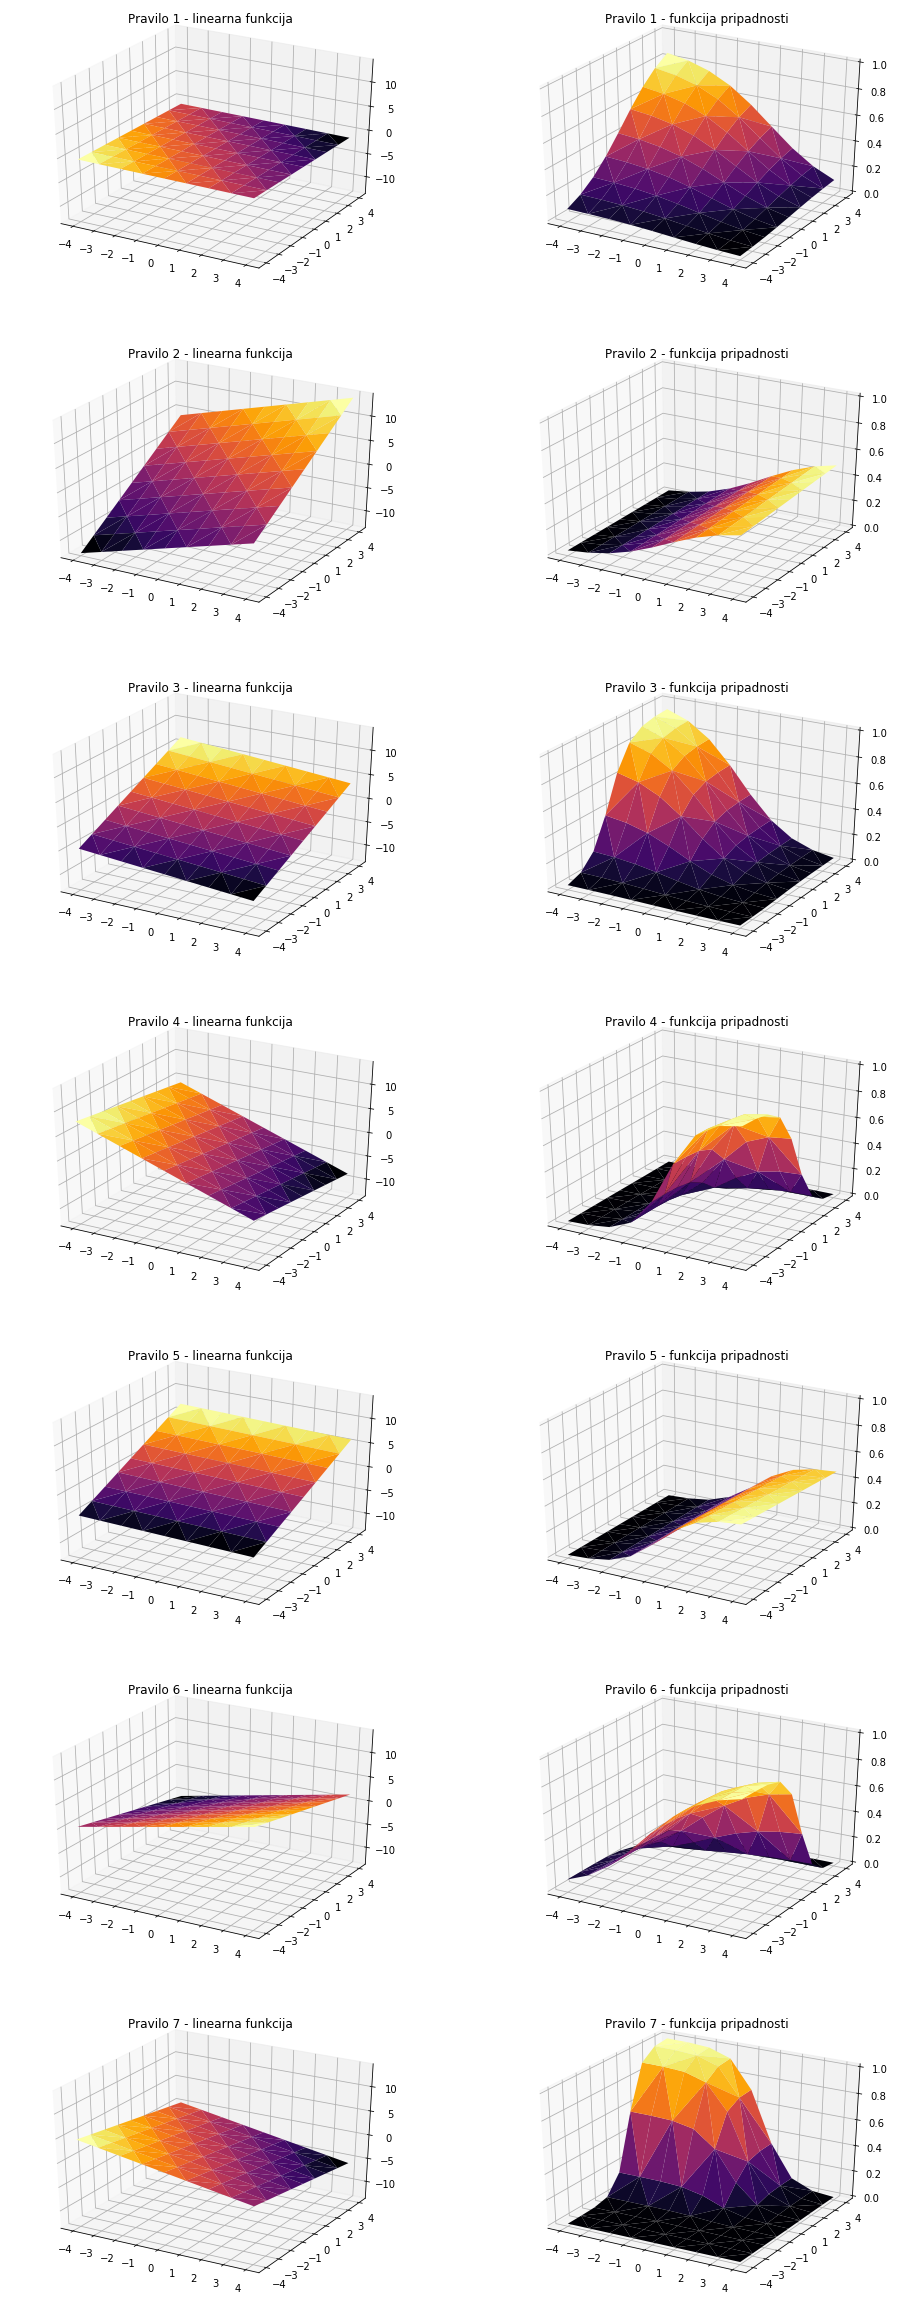

In [23]:
task_5_fig = plt.figure()

task_5_ax = [task_5_fig.add_subplot(task_5_rule_count, 2, i + 1, projection="3d")
             for i in range(task_5_rule_count * 2)]

task_5_titles = list(zip([f"Pravilo {i + 1} - linearna funkcija" for i in range(rule_count)],
                         [f"Pravilo {i + 1} - funkcija pripadnosti" for i in range(rule_count)]))

task_5_fig.set_figwidth(16)
task_5_fig.set_figheight(6 * rule_count)

for i, triple_pair in enumerate(zip(linear_triples, sigmoid_triples)):
    for j, triple in enumerate(triple_pair):
        task_5_ax[i * 2 + j].set_title(task_5_titles[i][j])
        
        if j == 0:
            task_5_ax[i * 2 + j].set_zlim(task_5_linear_zmin, task_5_linear_zmax)
        else:
            task_5_ax[i * 2 + j].set_zlim(task_5_sigmoid_zmin, task_5_sigmoid_zmax)

        
        task_5_ax[i * 2 + j].plot_trisurf(*triple, cmap=cm.inferno)

<br><br>

## Zadatak 8.

Ovdje ćemo gledati utjecaj stopa učenja na gubitak. Kako funkcija **fit** vraća povijest vrijednosti gubitaka, na nama je samo da odredimo stope učenje.

Kako imamo dvije stope učenja, imat ćemo uređene parove stopa učenja. Po intuiciji, dalo bi se zaključiti da su provjere vrijedne stope učenja u intervalu od $\left[{10}^{-7}, {10}^{-1} \right]$. Za stopu učenja se obično gleda logaritamska skala - u ovom slučaju će nam sljedeća veća stopa učenja biti $10$ puta veća od prošle. Stoga, prostor pretraživanja nam je $U \times U$, gdje je $U = \left\{ {10}^{-7}, {10}^{-6}, {10}^{-5}, {10}^{-4}, {10}^{-3}, {10}^{-2}, {10}^{-1}\right\}$. S obzirom na to da će ovo dati sveukupno $49$ tj. $98$ različitih grafova, mi ćemo prikazati samo $3$, tj. $6$ grafa ($3$ po algoritmu učenja).

Također, ovo će rezultirati velikim brojem učenja. Kako bi smanjili vrijeme potrebno za izračunavanje, limitirat ćemo učenje na $200$ epoha te nećemo zaustavljati trening kad poboljšanje krene stagnirati.

In [29]:
task_8_rule_count = 7
task_8_batch_sizes = [1, len(x_tr)]
task_8_learning_rates = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    
task_8_learning_rates = task_8_learning_rates
    
task_8_loss = SquareError()
task_8_epochs = 200
task_8_verbose = 0
task_8_shuffle = False
task_8_stop_ani = False

In [30]:
task_8_histories = [dict(), dict()]

with tqdm(total=len(task_8_learning_rates) * len(task_8_learning_rates)) as pbar:
    for lr_dense in task_8_learning_rates:
        for lr_sigmoid in task_8_learning_rates:
            for i, batch_size in enumerate(task_8_batch_sizes):
                current_model = ANFIS(2, rule_count)
                current_model.compile(loss=task_8_loss)

                current_loss = current_model.fit(x=x_tr, y=y_tr,
                                                 batch_size=batch_size,
                                                 epochs=task_8_epochs,
                                                 verbose=task_8_verbose,
                                                 shuffle=task_8_shuffle,
                                                 learning_rate_dense=lr_dense,
                                                 learning_rate_sigmoid=lr_sigmoid,
                                                 stop_after_no_improvement=task_8_stop_ani)["loss"]

                task_8_last_losses = [interior_loss[-1] for interior_loss in current_loss]

                task_8_histories[i][(lr_dense, lr_sigmoid)] = task_8_last_losses
                
            pbar.update()

100%|██████████| 49/49 [39:45<00:00, 48.68s/it]


---

Sada ćemo odrediti koja kombinacija ima najmanji zadnji gubitak kao optimalni, odvojeno za svaki način treniranja:

In [31]:
min_indices = list()

task_8_losses = [[(item[0], item[1][-1]) for item in training_losses.items()]
                 for training_losses in task_8_histories]
task_8_loss_values = [[loss[1] for loss in training_losses] for training_losses in task_8_losses]

for i, training_losses in enumerate(task_8_loss_values):
    min_indices.append(task_8_losses[i][np.argmin(training_losses)][0])

In [32]:
task_8_indices_to_plot = [*[task_8_losses[i][0][0] for i in range(len(task_8_losses))],
                          *[min_indices[i] for i in range(len(task_8_losses))],
                          *[task_8_losses[i][-1][0] for i in range(len(task_8_losses))]]

task_8_titles = [f"(η₁,η₂) = ({index[0]:.0e}, {index[1]:.0e}) - {'Stohastički' if i % 2 == 0 else 'Klasično'}" for i, index in enumerate(task_8_indices_to_plot)]

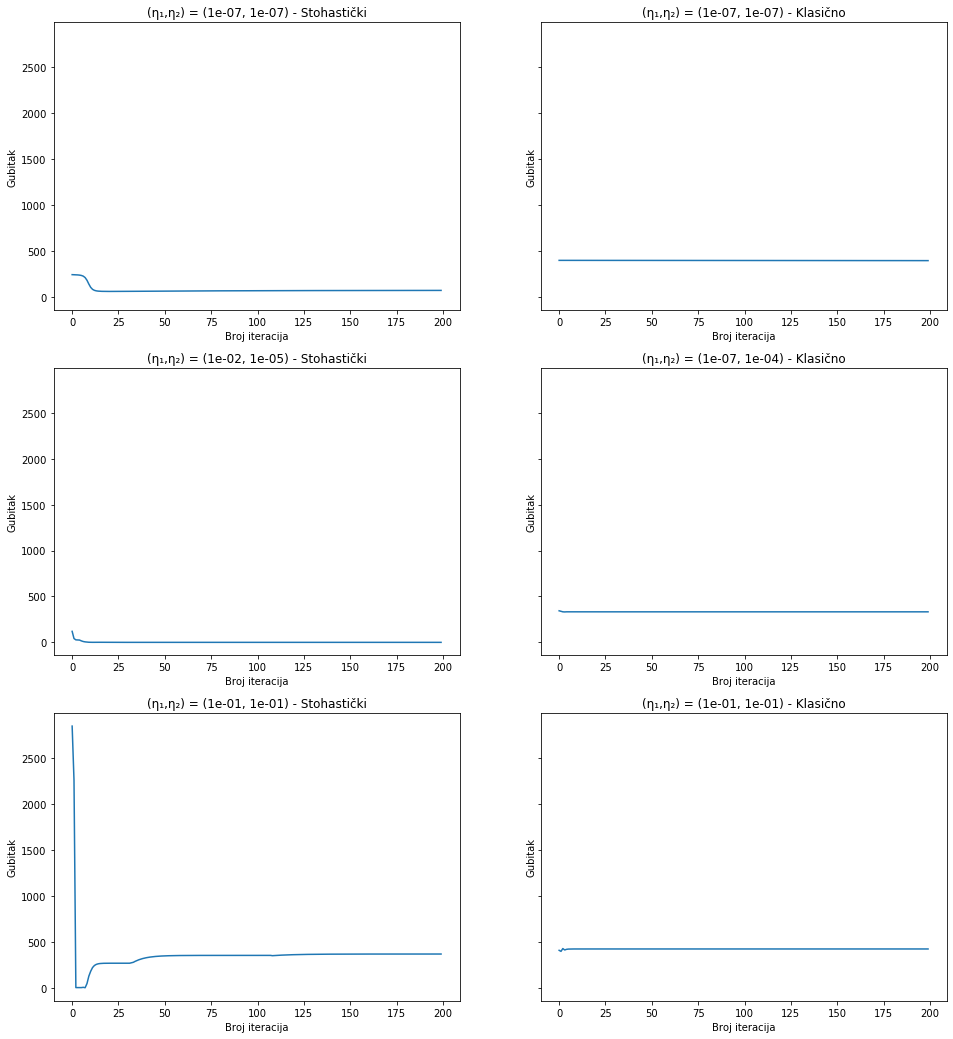

In [34]:
task_8_fig, task_8_axes = plt.subplots(3, 2, sharey=True, figsize=(16, 3 * len(task_8_titles)))

for (i, index), name in zip(enumerate(task_8_indices_to_plot), task_8_titles):
    task_8_axes[i // 2][i % 2].set_title(name)
    task_8_axes[i // 2][i % 2].set_xlabel("Broj iteracija")
    task_8_axes[i // 2][i % 2].set_ylabel("Gubitak")
    
    current_entry = task_8_histories[i % 2][index]
    
    task_8_axes[i // 2][i % 2].plot(np.arange(len(current_entry)), current_entry)